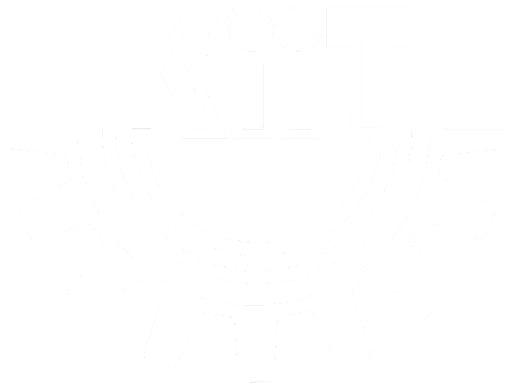

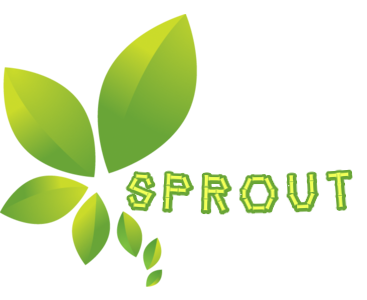

#Computer Laboratory Chat-Bot : Sprout🌱
###Hey there, I am using ~Whatsapp~ NLP!








---



---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Install required packages
####Natural Language Toolkit
NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries

####Newspaper3k
Web Scraping is a powerful tool to gather information from a website. To scrape multiple URLs, we can use a Python library called Newspaper3k. The Newspaper3k package is a Python library used for Web Scraping articles, It is built on top of requests and for parsing lxml. 

####Pillow
Python Imaging Library

In [ ]:
!pip install nltk
!pip install newspaper3k
!pip install Pillow

##Importing required packages

In [ ]:
from newspaper import Article
import random
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from PIL import Image
import IPython.display as display
import warnings
warnings.filterwarnings('ignore')

In [ ]:
nltk.download('punkt',quiet=True) ##need to download the punkt resource separately

True

##Downoading source data article and parsing
####Creating the corpus 

In [ ]:
# article = Article('https://engineeringinterviewquestions.com/data-structures-viva-questions-and-answers-cse/')
# article = Article('https://hackr.io/blog/programming-interview-questions')
article = Article('https://www.dataprise.com/it-glossary')
article.download()
article.parse()
article.nlp()
corpus = article.text

In [ ]:
print(corpus)

####We can also scrape from multiple URLs using newspaper3k
For the sake of simplicity we shall demonstrate using only one URL, as more URLs shall require more pre-processing and cleaning of the data.

In [ ]:
# # Define list of urls
# list_of_urls = ['https://www.geeksforgeeks.org/how-to-get-the-magnitude-of-a-vector-in-numpy/',
#                 'https://www.geeksforgeeks.org/3d-wireframe-plotting-in-python-using-matplotlib/',
#                 'https://www.geeksforgeeks.org/difference-between-small-data-and-big-data/']
 
# # Parse through each url and display its content
# for url in list_of_urls:
#     url_i = newspaper.Article(url="%s" % (url), language='en')
#     url_i.download()
#     url_i.parse()
#     print(url_i.text)

###Preprocessing and Data Cleaning
Generating sentences using the corpus.

In [ ]:
#tokenization
text = corpus
sentence_list= nltk.sent_tokenize(text)   # list of sentences

In [ ]:
sentence_list

Cleaning the data by replacing newline characters by spaces to maintain the authenticity of the article. 

In [ ]:
for i in range (0, len(sentence_list)-1):
  if "\n" in sentence_list[i]:
    sentence_list[i]=sentence_list[i].replace("\n", " ")

In [ ]:
sentence_list

['access point:  A device that allows wireless-equipped computers and other devices to communicate with a wired network.',
 'accessibility:  As specified in Section 508 of the 1998 Rehabilitation Act, the process of designing and developing Web sites and other technology that can be navigated and understood by all people, including those with visual, hearing, motor, or cognitive impairments.',
 'This type of design also can benefit people with older/slower software and hardware.',
 'ActiveX:  A technology from Microsoft that links desktop applications to the World Wide Web.',
 'Using ActiveX tools, interactive web content can be created.',
 'Example: In addition to viewing Word and Excel documents from within a browser, additional functionality such as animation, credit card transactions, or spreadsheet calculations.',
 'address:  Identifies the location of an Internet resource.',
 'Examples: an e-mail address ([email protected]); a web address (http://www.dataprise.com); or an interne

##ChatBot

####Function to return a random greeting response to a user's greeting response

In [ ]:
def greeting_response(text):
  text=text.lower()

  # Bot's response
  bot_greetings = ['Hi!','Hola!','Hello!','Hey!','Yo!']
  # user's greetings
  user_greetings = ['hey','hello','greetings','hola','howdy','hi']

  for word in text.split():
    if word in user_greetings:
      return random.choice(bot_greetings)         # generating a random greeting message as a response to user's greeting

####Sorting wrt the similarity scores between input and sentence list

In [ ]:
def index_sort(list_var):                         # to sort indices
  length = len(list_var)
  list_index = list(range(0,length))

  x= list_var
  for i in range(length):
    for j in range(length):
      if x[list_index[i]] > x[list_index[j]] :
        #swap
        temp = list_index[i]
        list_index[i] = list_index[j]
        list_index[j] = temp

  return list_index

####Function for Bot's Response

In [ ]:
# create bot's response
def bot_response(user_input):
  user_input = user_input.lower()
  sentence_list.append(user_input)
  bot_response = ''
  cm = CountVectorizer().fit_transform(sentence_list)     # tranform list to a count matrix
  similarity_scores = cosine_similarity(cm[-1],cm)        # COMPARING last sentence of cm to rest of cm 
  similarity_scores_list = similarity_scores.flatten()    # to reduce dimensionality of similarity_scores
  index = index_sort(similarity_scores_list)              # to sort indices for highest value in similarity_scores
  index = index[1:]                                       # to contain values other than itself
  response_flag = 0

  j = 0                                                   
  for i in range(len(index)):
    if similarity_scores_list[index[i]] > 0.0 :           # FOUND a similarity
      bot_response = bot_response + ' ' + sentence_list[index[i]]
      response_flag = 1
      j = j+1
    
    if j > 2:                                             # if we found two or less similar and brings back only the top 2 similar ones to user_input
      break
    
  if response_flag == 0 :                                 # if no sentence matches
    bot_response = bot_response + 'Deepest apologies, I am still learning and I cannot help you with this! Want to try something else?'

  sentence_list.remove(user_input)

  return bot_response



---



---



###Driver Code

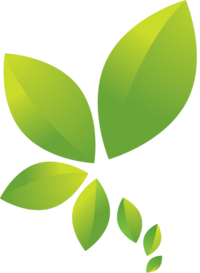

Sprout: Hey there! My name is Sprout. I will answer your queries on tech terminologies.
 	To exit, Enter bye.
Input: Hey
Sprout: Hey!
Input: VoIP
Sprout:  VoIP:  Voice over Internet Protocol; a means of using the Internet as the transmission medium for phone calls.
Input: SMTP
Sprout:  SMTP:  Simple Mail Transfer Protocol; a method of handling outgoing electronic mail.
Input: DIMM
Sprout:  DIMM:  Dual In-line Memory Module; a small circuit board that can hold a group of memory chips. A DIMM is capable of transferring 64 bits instead of the 32 bits each SIMM can handle. Pentium processors require a 64-bit path to memory so SIMMs must be installed two at a time as opposed to one DIMM at a time.
Input: pop
Sprout:  pop-up blocker:  Any application that disables the pop-up, pop-over, or pop-under ad windows that appear when you use a web browser. POP:  Post Office Protocol; a method of handling incoming electronic mail. Example: error checking for file transfers or POP for handling electro

In [ ]:
# logo
display.display(Image.open('/content/drive/MyDrive/Final_Project/Sprout/Sprout_final_icon_small.png'))

# start the chat
print('\n\nSprout🌱 : Hey there! My name is Sprout. I will answer your queries on tech terminologies.\n \tTo exit, Enter bye.')

exit_list = ['exit','bye','see you later', 'quit', 'x']
while(True):
  user_input = input("Input: ")
  if user_input.lower() in exit_list:
    print('Sprout🌱 : Bye! Let us catch up later!')
    break
  else:
    if greeting_response(user_input) != None:
      print('Sprout🌱 : '+greeting_response(user_input))

    else:
      print('Sprout🌱 : '+ bot_response(user_input))